# 0 Set Up del notebooke para el procesamiento de datos

In [1]:
!pip install pingouin
 #importar las librerias necesarias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import cronbach_alpha

In [3]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

# 1 Cargue de los datos en dataframe

In [4]:
#Carga del archivo en un dataframe
df = pd.read_excel('data_enc.xlsx')
#Tamaño de la tabla original sin procesar
print("la tabla tiene (filas, Columnas)\n\t\t", df.shape)

la tabla tiene (filas, Columnas)
		 (1007, 97)


# 2 Limpieza de los datos de encuesta

In [5]:
#Quitar a los registros que correspondan a menores de edad
dfpre1= df[df['Edad en años (solo números sin espacio)'] >= 18]

#Quitar a los registros de edad que estén vacíos
dfpre1 = dfpre1[
    dfpre1['Edad en años (solo números sin espacio)'].notna() &
    (dfpre1['Edad en años (solo números sin espacio)'].astype(str).str.strip() != '')
]

#Quitar a los registros que correspondan a encuestas incompletas
dfpre1 = dfpre1[dfpre1['Progreso'] >= 76]
print(dfpre1['Progreso'].describe())


#Quitar a los registros atípicos que persisten sin el diligenciamiento completo
id_a_borrar = ['R_7lSrkdBTUeNyNFv', 'R_5tLSJarq6XpSzgC', 'R_6S7SnL86wkW3bUg', 'R_3RXWSqsPp2FsRvb']
dfpre1 = dfpre1[~dfpre1['ID de respuesta'].isin(id_a_borrar)]

# Tamaño de la tabla luego de la remoción de encuestas con algún tipo de problema
print('La tabla tiene (Filas, Coumnnas) \n\t\t', dfpre1.shape)

count    669.000000
mean      97.704036
std        7.064438
min       76.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Progreso, dtype: float64
La tabla tiene (Filas, Coumnnas) 
		 (665, 97)


In [6]:
#Retirar de la primera base de datos filtrada columnas que no voy a utilizar
col_a_borrar = [
    'Fecha de inicio',
    'Fecha de finalización',
    'Tipo de respuesta',
    'Dirección IP',
    'Progreso',
    'Duración (en segundos)',
    'Finalizado',
    'Fecha registrada',
    'Latitud de la ubicación',
    'Longitud de la ubicación',
    'Canal de la distribución',
    'Idioma del usuario',
    'Addressing gender issues in STEM higher education institutions\n\n\n\nEncuesta: "Desde STEM hasta mi Programa Académico: Una Mirada Personal"\n\n\n\nCONSENTIMIENTO INFORMADO\n \n\nTítulo del Proyecto: STEM sin Fronteras de Género: Estrategias para una Educación Inclusiva\n\n\n\nDescripción del Proyecto:\n\nUsted ha sido seleccionado para participar en un estudio llevado a cabo por el Institute for the Future of Education del Tecnológico de Monterrey, México, junto con la Universidad del Norte, la Universidad EAFIT y la Universidad ICESI en Colombia. Este estudio tiene como objetivo explorar las perspectivas de los estudiantes sobre su desarrollo personal y su experiencia en los programas académicos de las áreas de ciencia, ingeniería, tecnología y matemáticas (STEM, por sus siglas en inglés).\n\n\n\nComo sujeto de la investigación a usted se le solicitará participar en las siguientes actividades:\n\n\n\tActividad: Encuesta.\n\tTiempo de Duración (aproximado): 12-14 minutos.\n\tObjetivo de la actividad: Recopilar datos sobre la perspectiva del estudiantado en relación con su programa académico en áreas STEM. Una vez completada la investigación, se destruirán todas las fuentes de datos, notas y otros documentos relacionados. Los datos de la investigación serán recogidos por la Dra. Silvana Montoya Noguera investigadora responsable, y serán utilizados únicamente en el contexto del proyecto previamente estipulado. La investigación se desarrollará en los predios de la Universidad.\n\n\nRiesgos y Beneficios:\n\nPueden existir riesgos asociados a la participación en este estudio, como posibles tensiones emocionales al reflexionar sobre temas sensibles. Sin embargo, los beneficios incluyen la oportunidad de contribuir a la comprensión y abordaje de los problemas de género en las instituciones de educación superior que se centran en las áreas STEM. Además, en caso de ser necesario, pueden contactar al El Departamento de Desarrollo Estudiantil, de la Dirección de Desarrollo Humano-Bienestar Universitario a través del correo electrónico dllo.estudiantil@eafit.edu.co para recibir apoyo.\n\nPor otro lado, este estudio ofrece beneficios significativos, incluyendo la oportunidad de contribuir a la comprensión y solución de los problemas de género en las instituciones de educación superior, especialmente en las áreas STEM.\n\n\n\nRemuneración: \n\nNo se ofrece remuneración por participar en este estudio.\n\n\n\nAlmacenamiento de datos para proteger la confidencialidad:\n\nSu identidad y cualquier otra información que lo pueda identificar no serán reveladas en ninguna presentación pública del estudio. La información será tratada de forma confidencial y todas las fuentes de datos se mantendrán resguardadas por el equipo de investigación.\n\n\n\nTiempo:\n\nEl tiempo de participación requerido por el proyecto es de aproximadamente de 12 a 14 minutos para completar la encuesta. El período de recopilación de datos es de febrero a abril de 2025.\n\n\n\nUso de los resultados:\n\nLos resultados de este estudio se presentarán en forma de informes a comisiones institucionales, ponencias a congresos, encuentros o reuniones nacionales e internacionales, artículos para revistas indexadas, y capítulos de libros y/o libros.\n\n \n\nDERECHO DE LOS PARTICIPANTES\n\n\n\nInvestigadores principales: Dra. Silvana Montoya Noguera.\n\n\n\nTítulo del proyecto: Addressing gender issues in STEM higher education institutions.\n\n\n\nAl seleccionar la opción "Sí", acepto que: \n\n\n\tHe leído y comprendido la descripción del estudio.\n\tHe tenido la oportunidad de formular preguntas sobre los propósitos y procedimientos del estudio.\n\tEntiendo que mi participación en el estudio es voluntaria y que puedo decidir no participar o retirarme en cualquier momento sin ningún perjuicio futuro.\n\tAcepto que los investigadores pueden retirarme del estudio según su discreción profesional.\n\tEn caso de que surja nueva información durante el estudio que pueda afectar mi disposición para continuar participando, los investigadores me informarán al respecto.\n\tEntiendo que cualquier información que pueda identificarme personalmente derivada del estudio no será divulgada sin mi consentimiento explícito.\n\tConfirmo que he recibido la información necesaria sobre el estudio.\n\tAl seleccionar “Sí”, expreso mi decisión de participar en el estudio.\n\n\nSi tiene alguna pregunta o duda respecto a este estudio en que se le está invitando a participar, puede contactarse con la Dra. Silvana Montoya Noguera, investigadora responsable, al correo electrónico: smontoyan@eafit.edu.co. Si tiene dudas con respecto a los derechos y deberes que tiene usted como sujeto participante del estudio debe comunicarse con el Natalia Yepes Jimenez del Comité de ética en investigación que avala este proyecto, en este caso, el Comité de ética en investigación de la Universidad EAFIT: cei@eafit.edu.co\u200b\u200b\u200b. Página web del Comité: https://www.eafit.edu.co/investigacion/Paginas/Comite-Institucional-de-Etica-en-Investigacion.aspx.\n\n\n \n\n Acepto participar',
    'Nombre completo',
    'Código',
    '1. ¿Cuáles son los adjetivos o términos que describen a las mujeres en áreas STEM? Es decir, las mujeres en áreas STEM son...',
    '2. ¿Cuáles son los adjetivos o términos que describen a los hombres en áreas STEM? Es decir, los hombres en áreas STEM son...',
    '3. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia en áreas STEM?',
    '4. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia ciencias sociales, humanidades, letras, etc.?',
    '5. ¿Qué áreas de estudio, programas y/o profesiones consideras "exclusivas para hombres", "exclusivas para mujeres" y/o "para ambos sexos"? ¿Por qué?',
    '6. ¿Cuál es tu percepción acerca de los derechos y oportunidades de mujeres y hombres en los estudios y/o en el ámbito laboral relacionados con el área STEM? ¿Por qué?',
    '7. Indica brevemente qué consideras por ciencia.'
]
dfpre2 = dfpre1.drop(columns = col_a_borrar)
     

# 3 Exploración de datos incial

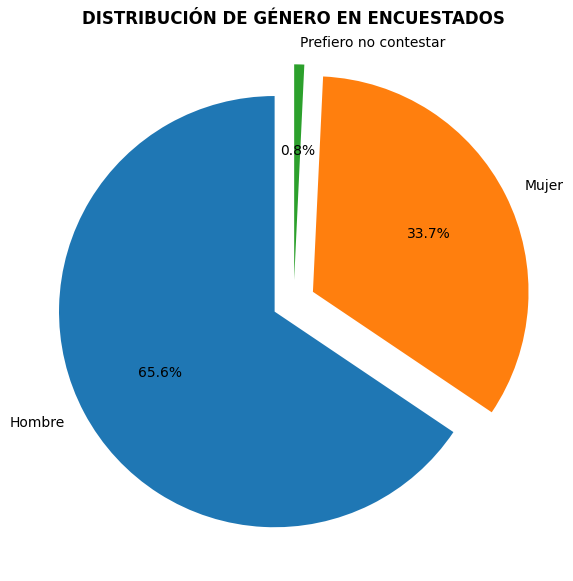

In [7]:
#PRIMERA VARIABLE A DESCRIBIR: GENERO *PASTEL*

past_gen = dfpre2['Sexo biológico'].value_counts()
print('\n\n')
# --- Graficamos el pastel con mejoras ---
plt.figure(figsize=(7, 7)) # Hacemos el gráfico más grande y cuadrado para que se vea bien

past_gen.plot.pie(
    autopct='%1.1f%%',  # Formato para mostrar porcentajes con un decimal. Ej: '37.5%'
    startangle=90,      # Inicia el primer trozo en la parte superior (90 grados)
    shadow=False,        # Añade una ligera sombra para un efecto 3D
    explode=(0.1, 0.1, 0.1) # "Explota" o separa ligeramente el primer trozo (el más grande)
)
plt.title('DISTRIBUCIÓN DE GÉNERO EN ENCUESTADOS', fontweight = 'bold')
plt.ylabel('') # Borramos la etiqueta de y
plt.show()

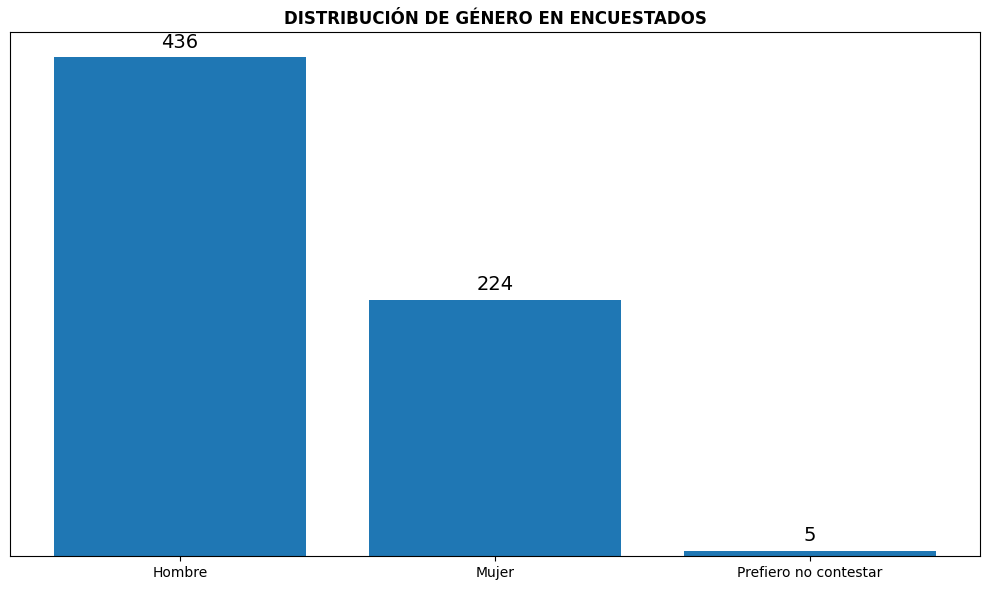

In [8]:
#PRIMERA VARIABLE A DESCRIBIR: GENERO *BARRAS*

bar_gen = dfpre2['Sexo biológico'].value_counts() #Conteo de cada categoría.

fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste del tamaño de la figura en esta línea.

bars1 = ax.bar(bar_gen.index, bar_gen.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars1, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN DE GÉNERO EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

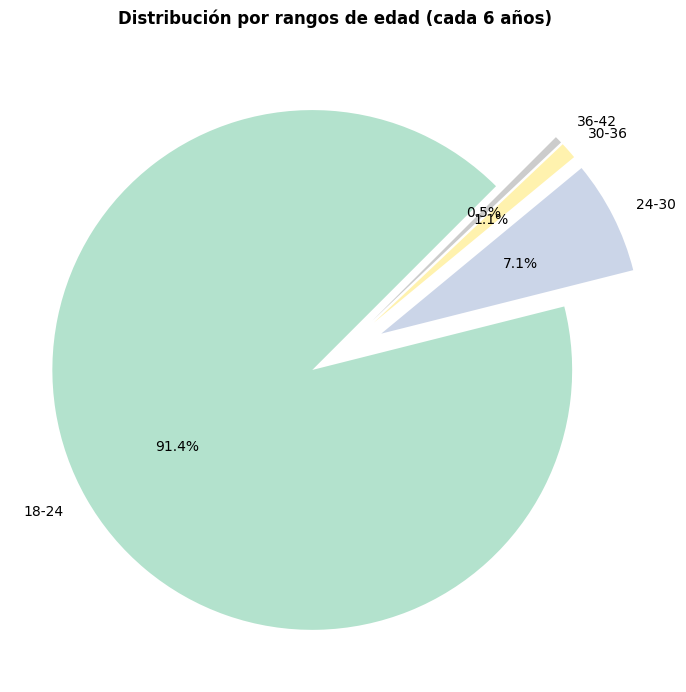

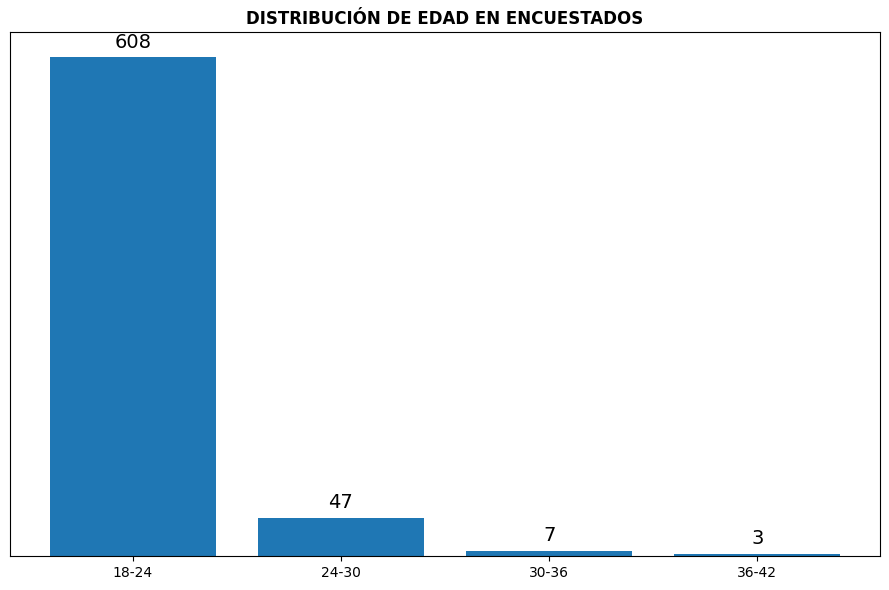

In [9]:
#SEGUNDA VARIABLE A DESCRIBIR: EDAD *PASTEL*

# Definir los bins (ajusta si tienes valores fuera del rango)
bins = range(18, 48, 6)  # Rango de 18 a 42 años, de 6 en 6
labels = [f"{i}-{i+6}" for i in bins[:-1]]  # Etiquetas tipo "15-19", "20-24", etc.

# Agrupar edades en rangos
past_edad = pd.cut(dfpre2["Edad en años (solo números sin espacio)"], bins=bins, labels=labels, right=False)
past_edad[219] = '36-42'

# Contar por grupo
count_past_edad = past_edad.value_counts().sort_index()


# Graficar el diagrama de pastel
plt.figure(figsize=(7, 8))
count_past_edad.plot.pie(autopct='%1.1f%%', startangle=45, cmap='Pastel2', explode=(0.1, 0.2, 0.2, 0.2))
plt.title("Distribución por rangos de edad (cada 6 años)", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

#SEGUNDA VARIABLE A DESCRIBIR:  EDAD *BARRAS*

fig, ax = plt.subplots(figsize=(9, 6)) # Ajuste del tamaño de la figura en esta línea.

bars2 = ax.bar(count_past_edad.index, count_past_edad.values) #construcción gráfica de barras de edades

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars2, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN DE EDAD EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

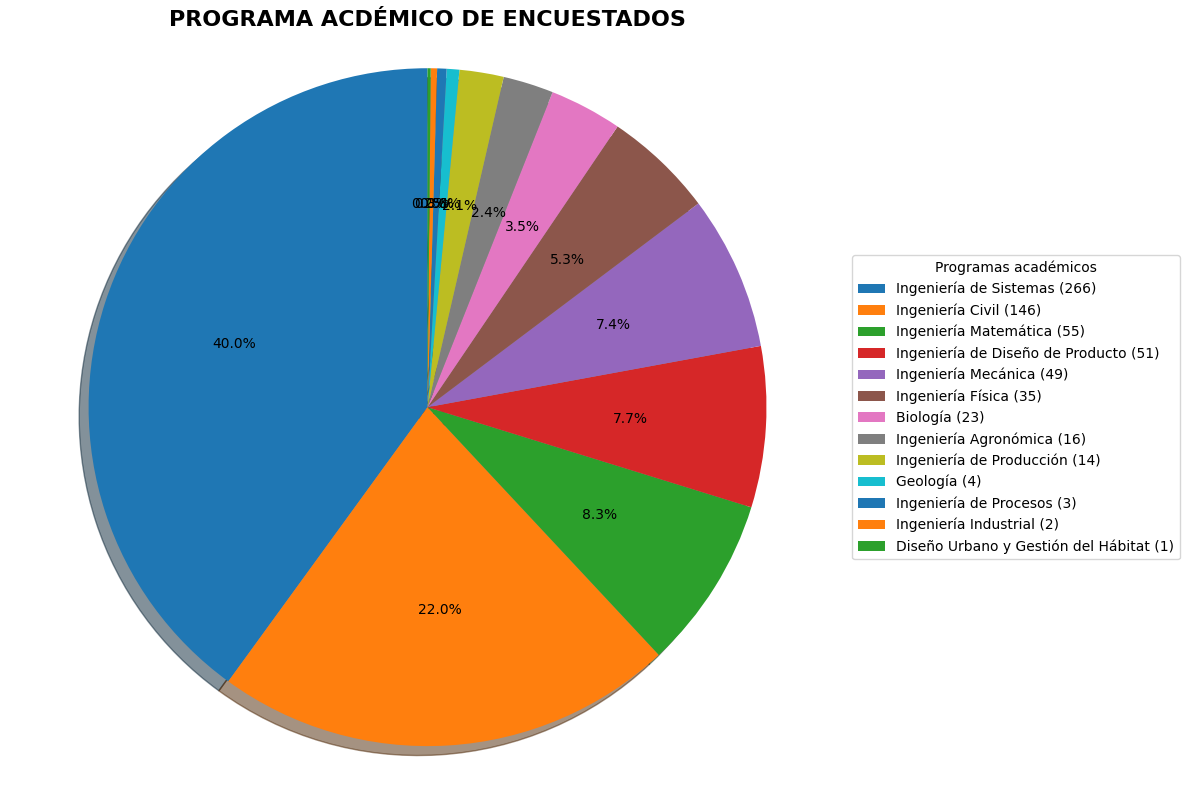

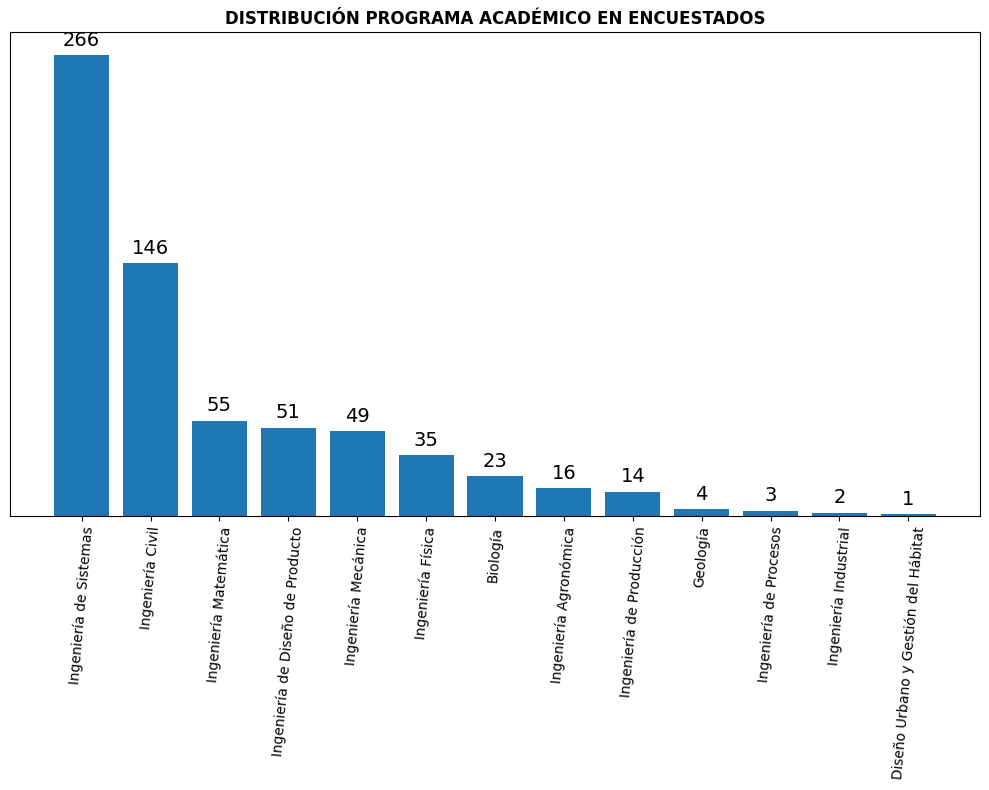

In [10]:
#TERCERA VARIABLE A DESCRIBIR: PROGRAMA ACADÉMICO *PASTEL*

past_prog = dfpre2['Programa académico'].value_counts()
print('\n\n')

# --- Graficamos el pastel con leyenda externa, por la cantidad de valores observados ---
fig, ax = plt.subplots(figsize=(12, 8)) # Ajuste del tamaño de la figura en esta línea.

wedges, texts, autotexts = plt.pie(
    past_prog.values,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    #explode=[0.1] + [0] * (len(past_gen) - 1) # Asegura el explode correcto
)
plt.title('PROGRAMA ACDÉMICO DE ENCUESTADOS', fontweight = 'bold', fontsize=16)
# Crear las etiquetas de la leyenda con el nombre y el porcentaje
# Zip junta los nombres de las categorías (índice de past_gen) con los porcentajes de autopct
# autotexts.get_text() te da el texto del porcentaje que se mostró en el pie.
legend_label_prog = [f"{label} ({val})" for label, val in zip(past_prog.index, past_prog.values)]

#Agregar la leyenda fuera del gráfico
# bbox_to_anchor es clave para posicionar la leyenda fuera del área del gráfico
plt.legend(wedges, legend_label_prog,
           title="Programas académicos",
           loc="center left", # Posiciona la leyenda a la izquierda
           bbox_to_anchor=(1, 0, 0.5, 1)) # Ajusta (x, y, ancho, alto) del cuadro de leyenda

plt.axis('equal') # Asegura que el pastel sea circular
plt.tight_layout() # Ajusta el layout para que la leyenda no se corte
plt.ylabel('') # Borramos la etiqueta de y
plt.show()

#TERCERA VARIABLE A DESCRIBIR: PROGRAMA ACADÉMICO *BARRAS*

bar_prog = dfpre2['Programa académico'].value_counts()
print('\n\n')

fig, ax = plt.subplots(figsize=(10, 8)) # Ajuste del tamaño de la figura en esta línea.

bars3 = ax.bar(bar_prog.index, bar_prog.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])
plt.xticks(rotation=85)

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars3, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN PROGRAMA ACADÉMICO EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

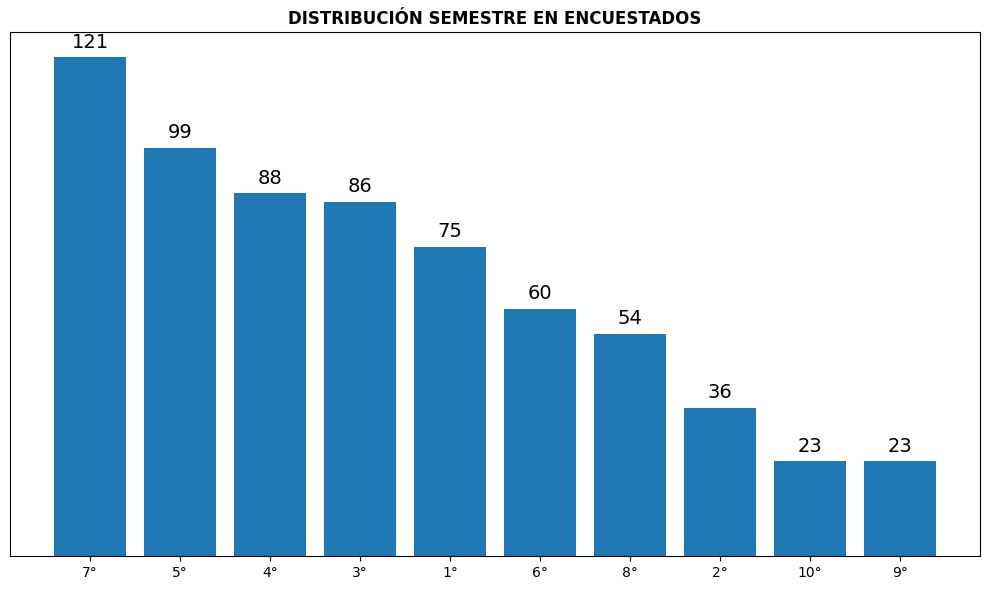

In [11]:
#CUARTA VARIABLE A DESCRIBIR: SEMESTRE *BARRAS*

bar_sem = dfpre2['Semestre más avanzado que estás cursando'].value_counts() #Conteo de cada categoría.

fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste del tamaño de la figura en esta línea.

bars4 = ax.bar(bar_sem.index, bar_sem.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars4, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN SEMESTRE EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

# 4 Codificación de las respuestas categóricas en las distintas características con condiciones de:

- Binarias.

- Categóricas Ordinales.
  - Escala Likert
  - Otras variables ordinales.

- Variables categóricas nominales.

In [12]:
#Creación del objeto para la conversión de escala a número.

conv_like ={
    'Totalmente en desacuerdo': 1,
    'Totalmente en desacuerdo\t': 1,
    'Totalmente en desacuerdo\t	': 1,
    'En desacuerdo': 2,
    'En desacuerdo\t': 2,
    'En desacuerdo\t	': 2,
    'Ni de acuerdo, ni en desacuerdo': 3,
    'De acuerdo': 4,
    'De acuerdo\t': 4,
    'De acuerdo\t	': 4,
    'Totalmente de acuerdo': 5
}

#Creación de lista para seleccionar las columnas a convertir.
colum_trans = dfpre2.columns[8:72]

In [13]:
#Una vez que comprobé los valores con punto flotante los pasaré a tipo entero.
for col in dfpre2.columns[72:75]:
    dfpre2[col] = dfpre2[col].astype(int)

#Conversión Columnas de escala Likert
dfpre3 = dfpre2.copy()
dfpre3[colum_trans] = dfpre3[colum_trans].replace(conv_like)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\80802982.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3[colum_trans] = dfpre3[colum_trans].replace(conv_like)


In [14]:
#Eliminación de la columna de identificadores de respuesta
dfpre3 = dfpre3.drop(columns = ['ID de respuesta'])

# Conversión de la pregunta de género a valores numéricos que representen las tres opciones de respuesta.
dfpre3['Sexo biológico'] = dfpre3['Sexo biológico'].replace({'Hombre': 0, 'Mujer': 1, 'Prefiero no contestar': 2})

#Conversión variable binaria característica de las becas.
dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'] = dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'].replace({'Sí': 1, 'No': 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\3532170635.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Sexo biológico'] = dfpre3['Sexo biológico'].replace({'Hombre': 0, 'Mujer': 1, 'Prefiero no contestar': 2})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\3532170635.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'] = dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'].replace({'Sí': 1, 'No': 0})


In [15]:
#El dataframe dfpre3 contiene las primeras transformaciones de escala likert
#y género Se convertirán ahora las variables:
# Semestre más avanzado que estás cursando | Máximo nivel educativo de Madre
#o tutora | Máximo nivel educativo de Padre o tutor

#Crear objeto para variable Semestre más avanzado que estás cursando

conv_sem = {
    '1°': 1,
    '2°': 2,
    '3°': 3,
    '4°': 4,
    '5°': 5,
    '6°': 6,
    '7°': 7,
    '8°': 8,
    '9°': 9,
    '10°': 10
}

#Crear Objeto para variable Máximo nivel educativo de Madre/Padre o tutor(a)

conv_tut = {
    'No tengo padre y/o tutor': 0,
    'No tengo madre y/o tutora': 0,
    'Ninguno': 1,
    'Primaria': 2,
    'Secundaria': 3,
    'Técnica':4,
    'Tecnológica': 5,
    'Profesional': 6,
    'Especialización': 7,
    'Maestría': 8,
    'Doctorado': 9
}

#Se convertirán ahora las variables: en numéricas por ser ordinales
# Semestre más avanzado que estás cursando | Máximo nivel educativo de Madre
#o tutora | Máximo nivel educativo de Padre o tutor

dfpre3['Semestre más avanzado que estás cursando'] = dfpre3['Semestre más avanzado que estás cursando'].replace(conv_sem)
dfpre3['Máximo nivel educativo de Madre o tutora'] = dfpre3['Máximo nivel educativo de Madre o tutora'].replace(conv_tut)
dfpre3['Máximo nivel educativo de Padre o tutor'] = dfpre3['Máximo nivel educativo de Padre o tutor'].replace(conv_tut)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\3974223451.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Semestre más avanzado que estás cursando'] = dfpre3['Semestre más avanzado que estás cursando'].replace(conv_sem)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\3974223451.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Máximo nivel educativo de Madre o tutora'] = dfpre3['Máximo nivel educativo de Madre o tutora'].replace(conv_tut)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2968\3974223451.py:43: Fu

In [17]:
#Agregar las >Dummy Variables para la Variable categórica. Nominal

#En primer lugar crear el Objeto que me permita seleccionar la columna a transformar

col_dumis = [
    'Programa académico'
]

#Agregar las >Dummy Variables para la Variable categórica.
dfpre4 = dfpre3.copy()
#Aplicar OneHotEncoding y reemplazar las columnas originales.
dfpre4 = pd.get_dummies(dfpre4, columns=col_dumis, prefix_sep='_', drop_first=False)

#Quitar los valore booleanos y solo permitir valores numéricos.
cols_bool = dfpre4.select_dtypes(include='bool').columns
dfpre4[cols_bool] = dfpre4[cols_bool].astype(int)

# 5 Preparación del dataframe 'dfpre4' para ser utilizado en los modelos de análisis y aprendizaje automático

## 5.1. Nombres y clasificación de columnas por constructo.

In [18]:
#Colocar nombres más cortos a las variables para que no queden como las
#Preguntas originales de la encuesta

dfpre5 = dfpre4.copy()

#Creación de objeto con los nombres nuevos para las variables

nue_nom_var = [
    "EDAD", "SEXO", "SEMESTRE", "BECA", "TUTORAM", "TUTORH", "AUTOEFICACIA_1",
    "AUTOEFICACIA_2", "AUTOEFICACIA_3", "AUTOEFICACIA_4", "AUTOREGU_1",
    "AUTOREGU_2", "AUTOREGU_3", "AUTOREGU_4", "AUTOREGU_5", "AUTOREGU_6",
    "INTR_1", "INTR_2", "INTR_3", "INTR_4", "EXTR_1", "EXTR_2", "EXTR_3",
    "EXTR_4", "AUTOEFICACIA_5", "AUTOEFICACIA_6", "AUTOEFICACIA_7",
    "AUTOEFICACIA_8", "AUTOEFICACIA_9", "PERTPRO_1", "PERTPRO_2", "PERTPRO_3",
    "PERTPRO_4", "PERTPRO_5", "PERTPRO_6", "PERTPRO_7", "PERTPRO_8",
    "PERTSTEM_1", "PERTSTEM_2", "PERTSTEM_3", "PERTSTEM_4", "COMPROMISO_1",
    "COMPROMISO_2", "COMPROMISO_3", "COMPROMISO_4", "COMPROMISO_5",
    "EXPEMPLEO_1", "EXPEMPLEO_2", "EXPEMPLEO_3", "EXPEMPLEO_4", "EXPEXITO_1",
    "EXPEXITO_2", "EXPEXITO_3", "EXPEXITO_4", "EXPEXITO_5", "EXPEXITO_6",
    "EXPEXITO_7", "EXPVALPER_1", "EXPVALPER_2", "EXPVALPER_3", "EXPVALPER_4",
    "EXPVALPER_5", "EXPVALPER_6", "EXPVALPER_7", "EXPVALPER_8", "ABANDON_1",
    "ABANDON_2", "ABANDON_3", "ABANDON_4", "ABANDON_5", "CGENPROG",
    "CESTPROG", "CGENSTE", "BIOLOG", "DISEÑO", "GEOLOG", "IAGRON", "ICIVIL",
    "IFISIC", "IINDUS", "IMATEM", "IMECAN", "IDISPRO", "IPROCE", "IPRODU",
    "ISISTE"
]

#Conversión de nombres de columnas
dfpre5.columns = nue_nom_var  #Operación de conversión



#CLASIFICACIÓN DE COLUMNAS POR CONSTRUCTO
#CREACIÓN DE OBJETOS QUE AGRUPEN LAS COLUMNAS DE CADA CONSTRUCTO

#"""{1.AUTOEFICACIA, 2.AUTORREGULACION, 3.MOTIVACION INTRINSECA,
#4.MOTIVACION EXTRINSECA, 5.SENTIDO DE PERTENENCIA AL PROGRAMA,
#6.SENTIDO DE PERTENENCIA A STEM, 7.COMPROMISO ACADÉMICO
#,8.EXPECTATIVAS DE EMPLEO, 9.EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM,
#10.EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM,
#11.INTENCIÓN DE ABANDONAR,12.COMPATIBILIDAD GENERO-PROGRAMA,
#13.COMPATIBILIDAD ESTUDIANTE-STEM,14.COMPATIBILIDAD GENERO-STEM}"""

# 1. AUTOEFICACIA
autoeficacia_cols = ['AUTOEFICACIA_1', 'AUTOEFICACIA_2', 'AUTOEFICACIA_3', 'AUTOEFICACIA_4',
                     'AUTOEFICACIA_5', 'AUTOEFICACIA_6', 'AUTOEFICACIA_7', 'AUTOEFICACIA_8',
                     'AUTOEFICACIA_9']
# 2. AUTORREGULACION
autorregu_cols = ['AUTOREGU_1', 'AUTOREGU_2', 'AUTOREGU_3', 'AUTOREGU_4', 'AUTOREGU_5', 'AUTOREGU_6']

# 3. MOTIVACION INTRINSECA
motivintrinseca_cols = ['INTR_1', 'INTR_2', 'INTR_3', 'INTR_4']

# 4. MOTIVACION EXTRINSECA
motivoextrinseca_cols = ['EXTR_1', 'EXTR_2', 'EXTR_3', 'EXTR_4']

# 5. SENTIDO DE PERTENENCIA AL PROGRAMA
pertprograma_cols = ['PERTPRO_1', 'PERTPRO_2', 'PERTPRO_3', 'PERTPRO_4', 'PERTPRO_5', 'PERTPRO_6', 'PERTPRO_7', 'PERTPRO_8']

# 6. SENTIDO DE PERTENENCIA A STEM
pertstem_cols = ['PERTSTEM_1', 'PERTSTEM_2', 'PERTSTEM_3', 'PERTSTEM_4']

# 7. COMPROMISO ACADÉMICO
compracad_cols = ['COMPROMISO_1', 'COMPROMISO_2', 'COMPROMISO_3', 'COMPROMISO_4', 'COMPROMISO_5']

# 8. EXPECTATIVAS DE EMPLEO
expempleo_cols = ['EXPEMPLEO_1', 'EXPEMPLEO_2', 'EXPEMPLEO_3', 'EXPEMPLEO_4']

# 9. EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM
expvalexit_cols = ['EXPEXITO_1', 'EXPEXITO_2', 'EXPEXITO_3', 'EXPEXITO_4', 'EXPEXITO_5', 'EXPEXITO_6', 'EXPEXITO_7']

# 10. EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM
expvalper_cols = ['EXPVALPER_1', 'EXPVALPER_2', 'EXPVALPER_3', 'EXPVALPER_4', 'EXPVALPER_5', 'EXPVALPER_6', 'EXPVALPER_7', 'EXPVALPER_8']

# 11. INTENCIÓN DE ABANDONAR
abandona_cols = ['ABANDON_1', 'ABANDON_2', 'ABANDON_3', 'ABANDON_4', 'ABANDON_5']

# 12. COMPATIBILIDAD GENERO-PROGRAMA
compatgenprog_cols = ['CGENPROG']

# 13. COMPATIBILIDAD ESTUDIANTE-STEM
compatestud_cols = ['CESTPROG']

# 14. COMPATIBILIDAD GENERO-STEM
compatgen_cols = ['CGENSTE']

## 5.2. Cálculo del alfa de cronbach por constructo

In [19]:
#Alfa [1. AUTOEFICACIA]
autoef1 = dfpre5[autoeficacia_cols]
alfa1, _ = cronbach_alpha(data=autoef1)
#Alfa [2. AUTORREGULACION]
autorreg1 = dfpre5[autorregu_cols]
alfa2, _ = cronbach_alpha(data=autorreg1)
#Alfa [3. MOTIVACION INTRINSECA]
motivintrinseca1 = dfpre5[motivintrinseca_cols]
alfa3, _ = cronbach_alpha(data=motivintrinseca1)
#Alfa [4. MOTIVACION EXTRINSECA]
motivoextrinseca1 = dfpre5[motivoextrinseca_cols]
alfa4, _ = cronbach_alpha(data=motivoextrinseca1)
#Alfa [5. SENTIDO DE PERTENENCIA AL PROGRAMA]
pertprograma1 = dfpre5[pertprograma_cols]
alfa5, _ = cronbach_alpha(data=pertprograma1)
#Alfa [6. SENTIDO DE PERTENENCIA A STEM]
pertstem1 = dfpre5[pertstem_cols]
alfa6, _ = cronbach_alpha(data=pertstem1)
#Alfa [7. COMPROMISO ACADÉMICO]
compracad1 = dfpre5[compracad_cols]
alfa7, _ = cronbach_alpha(data=compracad1)
#Alfa [8. EXPECTATIVAS DE EMPLEO]
expempleo1 = dfpre5[expempleo_cols]
alfa8, _ = cronbach_alpha(data=expempleo1)
#Alfa [9. EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM]
expvalexit1 = dfpre5[expvalexit_cols]
alfa9, _ = cronbach_alpha(data=expvalexit1)
#Alfa [10. EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM]
expvalper1 = dfpre5[expvalper_cols]
alfa10, _ = cronbach_alpha(data=expvalper1)
#Alfa [11. INTENCIÓN DE ABANDONAR]
abandona1 = dfpre5[abandona_cols]
alfa11, _ = cronbach_alpha(data=abandona1)

#Los constructos 12, 13 y 14 sólo tienen una pregunta, por lo tanto no se
#requiere de aplicar un método para saber si hay coherencia entre varios.

#Alfa [12. COMPATIBILIDAD GENERO-PROGRAMA]
#compatgenprog1 = dfpre5[compatgenprog_cols]
#alfa12, _ = cronbach_alpha(data=compatgenprog1)
#Alfa [13. COMPATIBILIDAD ESTUDIANTE-STEM]
#compatestud1 = dfpre5[compatestud_cols]
#alfa13, _ = cronbach_alpha(data=compatestud1)
#Alfa [14. COMPATIBILIDAD GENERO-STEM]
#compatgen1 = dfpre5[compatgen_cols]
#alfa14, _ = cronbach_alpha(data=compatgen1)
print(f"Alfa de Cronbach para AUTOEFICACIA: {alfa1:.4f}")
print(f"Alfa de Cronbach para AUTORREGULACION: {alfa2:.4f}")
print(f"Alfa de Cronbach para MOTIVACION INTRINSECA: {alfa3:.4f}")
print(f"Alfa de Cronbach para MOTIVACION EXTRINSECA: {alfa4:.4f}")
print(f"Alfa de Cronbach para SENTIDO DE PERTENENCIA AL PROGRAMA: {alfa5:.4f}")
print(f"Alfa de Cronbach para SENTIDO DE PERTENENCIA A STEM: {alfa6:.4f}")
print(f"Alfa de Cronbach para COMPROMISO ACADÉMICO: {alfa7:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DE EMPLEO: {alfa8:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM: {alfa9:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM: {alfa10:.4f}")
print(f"Alfa de Cronbach para INTENCIÓN DE ABANDONAR: {alfa11:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD GENERO-PROGRAMA: {alfa12:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD ESTUDIANTE-STEM: {alfa13:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD GENERO-STEM: {alfa14:.4f}"

Alfa de Cronbach para AUTOEFICACIA: 0.9286
Alfa de Cronbach para AUTORREGULACION: 0.7694
Alfa de Cronbach para MOTIVACION INTRINSECA: 0.7143
Alfa de Cronbach para MOTIVACION EXTRINSECA: 0.7938
Alfa de Cronbach para SENTIDO DE PERTENENCIA AL PROGRAMA: 0.8919
Alfa de Cronbach para SENTIDO DE PERTENENCIA A STEM: 0.9139
Alfa de Cronbach para COMPROMISO ACADÉMICO: 0.7872
Alfa de Cronbach para EXPECTATIVAS DE EMPLEO: 0.9412
Alfa de Cronbach para EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM: 0.9428
Alfa de Cronbach para EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM: 0.9347
Alfa de Cronbach para INTENCIÓN DE ABANDONAR: 0.9258


Todos los valores del alfa de cronbach muestran consistencia

α ≥ 0.70 → Aceptable

α ≥ 0.80 → Bueno

α ≥ 0.90 → Excelente

## 5.3. Reducción de dimensiones por constructo

In [20]:
#Los dataframe por constructo se denominan
#{autoef1, autorreg1, motivintrinseca1, motivoextrinseca1,
#pertprograma1, pertstem1, compracad1, expempleo1,
#expvalexit1, expvalper1, abandona1, compatgenprog1,
#compatestud1, compatgen1}

# [12. COMPATIBILIDAD GENERO-PROGRAMA]
compatgenprog1 = dfpre5[compatgenprog_cols]

# [13. COMPATIBILIDAD ESTUDIANTE-STEM]
compatestud1 = dfpre5[compatestud_cols]

# [14. COMPATIBILIDAD GENERO-STEM]
compatgen1 = dfpre5[compatgen_cols]

# DESCARGA DE LIBRERIAS PARA LA REDUCCION DE DIMENSIONES

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Paso 1 asignación de variable constructo.
X1 = autoef1
X2 = autorreg1
X3 = motivintrinseca1
X4 = motivoextrinseca1
X5 = pertprograma1
X6 = pertstem1
X7 = compracad1
X8 = expempleo1
X9 = expvalexit1
X10 = expvalper1
X11 = abandona1
X12 = compatgenprog1
X13 = compatestud1
X14 = compatgen1

# Paso 2 Estandarizar las columnas con 'z'
scaler = StandardScaler()

# 2.1. Aplicar Z-score

X1S = scaler.fit_transform(X1)
X2S = scaler.fit_transform(X2)
X3S = scaler.fit_transform(X3)
X4S = scaler.fit_transform(X4)
X5S = scaler.fit_transform(X5)
X6S = scaler.fit_transform(X6)
X7S = scaler.fit_transform(X7)
X8S = scaler.fit_transform(X8)
X9S = scaler.fit_transform(X9)
X10S = scaler.fit_transform(X10)
X11S = scaler.fit_transform(X11)
X12S = scaler.fit_transform(X12)
X13S = scaler.fit_transform(X13)
X14S = scaler.fit_transform(X14)

# Paso 3 Aplicar el PCA para reducción de dimensiones
pca = PCA(n_components=1)

# Aplicar PCA a cada constructo
PC1 = pca.fit_transform(X1S)
PC2 = pca.fit_transform(X2S)
PC3 = pca.fit_transform(X3S)
PC4 = pca.fit_transform(X4S)
PC5 = pca.fit_transform(X5S)
PC6 = pca.fit_transform(X6S)
PC7 = pca.fit_transform(X7S)
PC8 = pca.fit_transform(X8S)
PC9 = pca.fit_transform(X9S)
PC10 = pca.fit_transform(X10S)
PC11 = pca.fit_transform(X11S)
PC12 = X12S
PC13 = X13S
PC14 = X14S


In [22]:
# visualizar como quedaron los PCnn

#Opciones del arreglo de números Numpy para quitar la notación científica.
np.set_printoptions(precision=3, suppress=True)

#Mostrar en pantalla el arreglo resultante con la notación más adecuada.
print(PC1)

[[ -1.515]
 [  0.817]
 [  1.249]
 [  0.051]
 [  2.773]
 [  0.481]
 [  2.773]
 [ -0.722]
 [  2.773]
 [ -1.086]
 [  0.841]
 [  1.154]
 [  0.048]
 [ -1.51 ]
 [  0.877]
 [ -0.328]
 [  1.965]
 [ -0.722]
 [ -2.218]
 [  1.625]
 [  2.377]
 [ -0.246]
 [  1.208]
 [ -1.484]
 [ -1.874]
 [  2.393]
 [ -0.765]
 [ -1.527]
 [ -0.337]
 [ -0.722]
 [ -0.396]
 [  0.015]
 [ -0.417]
 [ -1.518]
 [  1.992]
 [  2.773]
 [  0.436]
 [  1.585]
 [  0.817]
 [  2.009]
 [  2.773]
 [  2.773]
 [  1.992]
 [  2.773]
 [  1.195]
 [ -0.316]
 [  2.773]
 [  2.773]
 [ -0.722]
 [ -0.722]
 [  2.773]
 [  2.035]
 [ -0.359]
 [  1.973]
 [  0.092]
 [ -0.218]
 [ -1.062]
 [ -1.479]
 [  0.411]
 [  0.021]
 [ -1.086]
 [ -0.296]
 [  0.06 ]
 [ -2.678]
 [ -4.171]
 [-11.208]
 [ -0.722]
 [  1.225]
 [ -0.722]
 [  1.625]
 [ -0.314]
 [  0.425]
 [  2.773]
 [ -9.598]
 [ -0.326]
 [  2.773]
 [  0.121]
 [  2.773]
 [  2.773]
 [ -0.722]
 [  0.841]
 [  2.773]
 [  1.619]
 [ -0.316]
 [ -1.89 ]
 [  0.817]
 [  0.817]
 [  2.773]
 [  0.42 ]
 [  2.005]
 [  0.768]

In [23]:
#Unir los arreglos PCA generados y conformar una matriz

matriz_pca = np.column_stack((PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14))

#convertir la matriz en un dataframe de pandas

col_pca = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']

df_pca = pd.DataFrame(matriz_pca, columns=col_pca)

print(df_pca.tail())

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
660 -1.132653 -1.723082 -2.068889 -2.252948 -1.344280 -0.752869  0.560754   
661 -5.379687 -2.760427 -1.880738 -1.054921 -5.684053 -1.105988  1.183679   
662  2.772661  1.218055  0.126101 -2.252948 -0.997621 -1.298874  0.906662   
663 -2.682228 -0.847741 -0.054577  0.327241 -0.384359 -1.739750 -2.853455   
664 -0.370260  0.411838 -0.249942 -0.612699 -0.618258  0.311094 -1.922174   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  
660  1.721105  1.363631  2.733808 -1.693130 -0.967693  0.517566 -0.000794  
661  0.649994  0.897340  1.137630 -1.693130 -1.463851 -0.707278  0.527246  
662  1.721105  0.063181 -0.759907 -1.056392  0.024621 -1.319700 -1.056874  
663  0.095596 -2.944226  0.407692  0.982713 -1.960008 -0.707278  1.055286  
664 -0.480861 -0.356690 -0.368484  0.764853 -0.471536 -0.094856 -0.000794  


In [24]:
#Seleccionar de dfpre5 las columnas a unir

col_anadir = ['EDAD', 'SEXO', 'SEMESTRE', 'BECA', 'TUTORAM', 'TUTORH',
              'BIOLOG', 'DISEÑO', 'GEOLOG', 'IAGRON', 'ICIVIL', 'IFISIC',
              'IINDUS', 'IMATEM', 'IMECAN', 'IDISPRO', 'IPROCE', 'IPRODU',
              'ISISTE'
              ]

df_resvar = dfpre5[col_anadir]
df_resvar.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True)
df_cluster = pd.concat([df_pca, df_resvar], axis=1)

df_cluster.tail(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,IAGRON,ICIVIL,IFISIC,IINDUS,IMATEM,IMECAN,IDISPRO,IPROCE,IPRODU,ISISTE
655,2.772661,1.713187,-0.284369,2.160850,2.513038,2.361938,1.183679,1.721105,2.655486,2.733808,...,0,0,0,0,0,0,0,0,0,1
656,1.660761,1.261452,1.549267,-1.625564,2.513038,2.361938,-1.708084,1.721105,1.791515,0.750509,...,0,0,1,0,0,0,0,0,0,0
657,1.256197,0.494674,0.126101,2.160850,-1.344280,-0.661763,1.183679,-1.019587,-0.768842,0.050504,...,0,0,0,0,1,0,0,0,0,0
658,2.772661,-0.367264,1.733551,-0.571108,0.709114,-0.129781,1.183679,0.051524,2.655486,0.799168,...,0,0,0,0,1,0,0,0,0,0
659,0.036288,-0.799467,-0.054577,-0.476080,-0.357743,-1.197093,1.183679,0.101938,2.655486,0.803678,...,0,0,0,0,1,0,0,0,0,0
660,-1.132653,-1.723082,-2.068889,-2.252948,-1.344280,-0.752869,0.560754,1.721105,1.363631,2.733808,...,0,0,0,0,0,0,0,0,0,1
661,-5.379687,-2.760427,-1.880738,-1.054921,-5.684053,-1.105988,1.183679,0.649994,0.897340,1.137630,...,0,0,0,0,0,0,0,0,0,1
662,2.772661,1.218055,0.126101,-2.252948,-0.997621,-1.298874,0.906662,1.721105,0.063181,-0.759907,...,0,0,0,0,0,0,0,0,0,1
663,-2.682228,-0.847741,-0.054577,0.327241,-0.384359,-1.739750,-2.853455,0.095596,-2.944226,0.407692,...,0,0,0,0,0,0,0,0,0,1
664,-0.370260,0.411838,-0.249942,-0.612699,-0.618258,0.311094,-1.922174,-0.480861,-0.356690,-0.368484,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Exportar el DataFrame a CSV
df_cluster.to_csv('df_cluster_27jun.csv', index=False)

# Si usas Jupyter Notebook local, puedes mostrar un enlace de descarga:
import os
from IPython.display import FileLink
display(FileLink('df_cluster_27jun.csv'))

c:\Users\ASUS\Documents\Codigos_prog\df_cluster_27jun.csv